In [ ]:
# IMPORTING PACKAGES
import pandas as pd # data processing
import numpy as np # working with arrays
from termcolor import colored as cl # text customization
import itertools # advanced tools

import matplotlib.pyplot as plt# visualization
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

**Reading and understanding the data**

In [ ]:
#importing data
df = pd.read_csv('/content/drive/MyDrive/creditcardfraud.csv')

df.head()

In [ ]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



**Handling missing values in columns**

In [ ]:
#Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
V1,0.0
V2,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


**Analysis**: We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.




**Outliers treatment**

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

**Checking the distribution of the classes**

In Class

0 ---> Normal Transaction

1 ---> Fradulent Transaction

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Analysis:** Data is imbalanced

In [ ]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
nonfraud_percentage = 100-fraud_percentage

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print()
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Percentage of Non-fraud cases is {}%'.format(nonfraud_percentage))
print()
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}%'.format(fraud_percentage))
print('--------------------------------------------')

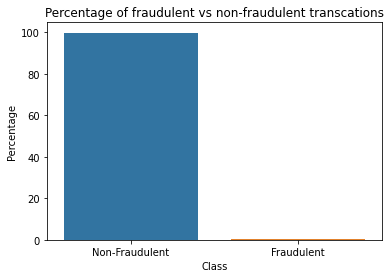

In [ ]:

# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[nonfraud_percentage, fraud_percentage]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [ ]:
#separting data for analysis
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

In [ ]:
print(nonfraud_cases.shape)
print(fraud_cases.shape)

(284315, 30)
(492, 30)



**Observe the distribution of classes with time**

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_cases['Time'],label='fraudulent',hist=False)
ax = sns.distplot(nonfraud_cases['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


**Analysis**:We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

**Observe the distribution of classes with amount**

In [ ]:

# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_cases['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(nonfraud_cases['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

**Analysis:**
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

In [ ]:
# statistical view of both fraud and non-fraud transaction amount data
nonfraud_cases.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud_cases.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Analysis:** Seeing the statistics and comparing it with Fraud and Non-fraud transaction, the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables

**Under-Sampling**

Build a sample dataset containing similar distribution of Fraud and Non-Fraud Transaction

Number of Fraud Transaction --->492

In [ ]:
#random sampling for non-fraud cases
nonfraud_sample = nonfraud_cases.sample(492)
nonfraud_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226354,-8.215276,7.701769,-5.202062,2.423779,-0.883941,3.361645,-8.631310,-19.195425,-3.016104,-0.509043,-2.222499,2.381455,-0.336140,3.822102,-1.891492,1.828693,0.709274,-0.309681,-3.058459,3.733849,-6.379394,2.813436,2.164819,0.418477,-0.434896,-0.252022,-1.176715,-0.417892,0.76,0
172875,-1.382063,-0.111050,1.104098,-0.560118,-0.093115,0.012636,-0.344526,0.694144,0.350560,-0.914715,-1.465658,0.225752,0.707530,-0.190921,0.393234,0.855317,-0.721086,0.400899,-0.376233,0.392203,0.217507,0.280226,0.180627,0.499223,-0.521855,0.324805,0.245258,0.074518,94.85,0
66599,-1.099954,0.514503,1.376853,-0.560267,-0.374602,0.168371,0.296586,0.389411,-1.470106,-0.470659,-1.992088,0.366818,1.458471,-0.401423,-1.254951,-1.480012,-0.150436,1.244734,-0.951046,-0.394879,-0.325725,-0.520998,-0.255806,-0.450509,0.849286,-0.322742,-0.059319,-0.005995,76.04,0
236226,-2.249486,0.081739,0.441904,1.721977,-0.180580,-0.706050,-0.312720,0.690355,0.233285,-0.439941,-1.256395,0.783574,-0.075629,0.197456,-0.969207,-0.735345,0.710080,-0.764719,1.147030,-1.164660,-0.516668,-0.579222,1.407223,0.336601,-0.806343,-1.031327,0.054091,-0.113703,21.85,0
128839,1.069315,-0.782245,1.304065,0.622999,-1.361309,0.355347,-0.913096,0.237361,1.803378,-0.587196,-1.633971,0.585880,-0.280237,-1.051778,-1.542621,-0.422154,0.419685,-0.598998,0.832134,0.021733,-0.226950,-0.322498,-0.082492,0.139206,0.266635,1.045127,-0.017707,0.022284,70.00,0


In [ ]:
#concatenating two dataframes into new dataset
newdf = pd.concat([nonfraud_sample,fraud_cases],axis=0)
newdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226354,-8.215276,7.701769,-5.202062,2.423779,-0.883941,3.361645,-8.631310,-19.195425,-3.016104,-0.509043,-2.222499,2.381455,-0.336140,3.822102,-1.891492,1.828693,0.709274,-0.309681,-3.058459,3.733849,-6.379394,2.813436,2.164819,0.418477,-0.434896,-0.252022,-1.176715,-0.417892,0.76,0
172875,-1.382063,-0.111050,1.104098,-0.560118,-0.093115,0.012636,-0.344526,0.694144,0.350560,-0.914715,-1.465658,0.225752,0.707530,-0.190921,0.393234,0.855317,-0.721086,0.400899,-0.376233,0.392203,0.217507,0.280226,0.180627,0.499223,-0.521855,0.324805,0.245258,0.074518,94.85,0
66599,-1.099954,0.514503,1.376853,-0.560267,-0.374602,0.168371,0.296586,0.389411,-1.470106,-0.470659,-1.992088,0.366818,1.458471,-0.401423,-1.254951,-1.480012,-0.150436,1.244734,-0.951046,-0.394879,-0.325725,-0.520998,-0.255806,-0.450509,0.849286,-0.322742,-0.059319,-0.005995,76.04,0
236226,-2.249486,0.081739,0.441904,1.721977,-0.180580,-0.706050,-0.312720,0.690355,0.233285,-0.439941,-1.256395,0.783574,-0.075629,0.197456,-0.969207,-0.735345,0.710080,-0.764719,1.147030,-1.164660,-0.516668,-0.579222,1.407223,0.336601,-0.806343,-1.031327,0.054091,-0.113703,21.85,0
128839,1.069315,-0.782245,1.304065,0.622999,-1.361309,0.355347,-0.913096,0.237361,1.803378,-0.587196,-1.633971,0.585880,-0.280237,-1.051778,-1.542621,-0.422154,0.419685,-0.598998,0.832134,0.021733,-0.226950,-0.322498,-0.082492,0.139206,0.266635,1.045127,-0.017707,0.022284,70.00,0


In [ ]:
newdf.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
newdf['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

**Analysis:** Now we have unifornly distributed datasets

In [ ]:
#comparing both transaction
newdf.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.075133,0.048672,-0.021199,0.007893,0.010723,0.107172,0.083531,-0.066046,-0.014645,0.008904,0.021997,0.018259,0.034272,0.019937,-0.026237,-0.059096,0.034075,-0.023454,-0.053273,-0.011682,0.048714,0.004825,0.013225,0.018112,0.025521,-0.000563,-0.025360,-0.015632,92.512805
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting the data into Feature and Target**

x ---> independent variable

y ---> dependent variable (target variable)

In [ ]:
#data split
x = newdf.drop(columns='Class', axis = 1)
y = newdf['Class']
print(x)

              V1        V2        V3  ...       V27       V28  Amount
226354 -8.215276  7.701769 -5.202062  ... -1.176715 -0.417892    0.76
172875 -1.382063 -0.111050  1.104098  ...  0.245258  0.074518   94.85
66599  -1.099954  0.514503  1.376853  ... -0.059319 -0.005995   76.04
236226 -2.249486  0.081739  0.441904  ...  0.054091 -0.113703   21.85
128839  1.069315 -0.782245  1.304065  ... -0.017707  0.022284   70.00
...          ...       ...       ...  ...       ...       ...     ...
279863 -1.927883  1.125653 -4.518331  ...  0.292680  0.147968  390.00
280143  1.378559  1.289381 -5.004247  ...  0.389152  0.186637    0.76
280149 -0.676143  1.126366 -2.213700  ...  0.385107  0.194361   77.89
281144 -3.113832  0.585864 -5.399730  ...  0.884876 -0.253700  245.00
281674  1.991976  0.158476 -2.583441  ...  0.002988 -0.015309   42.53

[984 rows x 29 columns]


In [ ]:
#y contains class labels
print(y)

226354    0
172875    0
66599     0
236226    0
128839    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Splitting data into Training data and Testing data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y, random_state = 0)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(984, 29) (787, 29) (197, 29)


**Modeling**



**Evaluation**

The evaluation metrics we are going to use are the Accuracy Score Metric ,F1 Score Metric, and Confusion matrix.

**Accuracy Score** = No.of correct predictions / Total no.of predictions

**F1 score** = 2( (precision * recall) / (precision + recall) )

**Confusion matrix:** is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones.

**1. Decision Tree**

In [ ]:
#Building Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_yhat = tree_model.predict(x_test)

In [ ]:
#Accuracy Score
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.9137055837563451


In [ ]:
# F1 score
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))

F1 score of the Decision Tree model is 0.907103825136612


In [ ]:
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#confusion matrix
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
tree_cm_plot = plot_confusion_matrix(tree_matrix,
                                classes = ['Non-fraud(0)','Fraud(1)'],
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

NameError: ignored

**2.K-Nearest Neighbors model (KNN)**

In [ ]:
#Building K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_yhat = knn.predict(x_test)

In [ ]:
#Accuracy Score
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the KNN model is 0.8883248730964467


In [ ]:
#F1 Score
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the KNN model is 0.8817204301075268


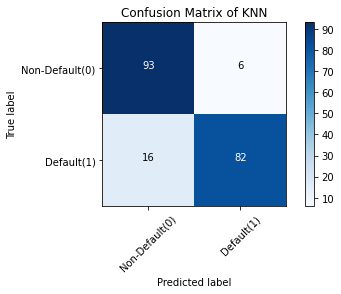

In [ ]:
#confusion matrix
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
knn_cm_plot = plot_confusion_matrix(knn_matrix,
                                classes = ['Non-Default(0)','Default(1)'],
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

**3. Logistic Regression**

In [ ]:
#Building Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_yhat = lr.predict(x_test)

In [ ]:
#Accuracy score
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9187817258883249


In [ ]:
#F1 score
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.9130434782608695


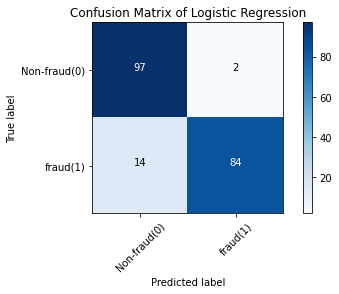

In [ ]:
#Confusion matrix
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
lr_cm_plot = plot_confusion_matrix(lr_matrix,
                                classes = ['Non-fraud(0)','fraud(1)'],
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

**4.Support Vector Machine(SVM)**

In [ ]:
# Building SVM
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_yhat = svm.predict(x_test)

In [ ]:
#Accuracy score
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the SVM model is 0.7715736040609137


In [ ]:
#F1 score
print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the SVM model is 0.7457627118644067


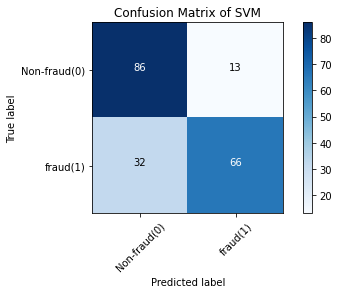

In [ ]:
# Confusion matrix
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
svm_cm_plot = plot_confusion_matrix(svm_matrix,
                                classes = ['Non-fraud(0)','fraud(1)'],
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

**5. Random Forest Tree**

In [ ]:
# Building Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_yhat = rf.predict(x_test)

In [ ]:
#Accuracy score
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest Tree model is 0.9086294416243654


In [ ]:
#F1 score
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest Tree model is 0.9


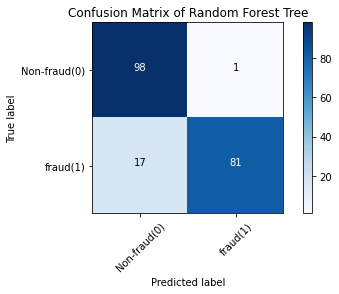

In [ ]:
#Confusion matrix
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
rf_cm_plot = plot_confusion_matrix(rf_matrix,
                                classes = ['Non-fraud(0)','fraud(1)'],
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()


**Compare between models scores and accuracies**